Violations above 108.5% but less than 111.5%: 0
Violations above 111.5%: 0


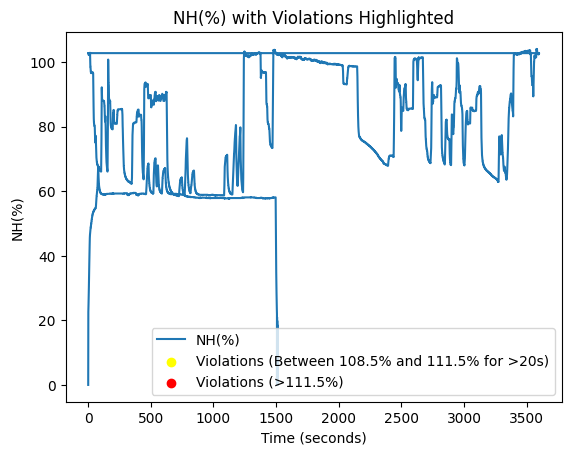

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('data_set.csv')

# Convert 'Time(hh)' to seconds if it's in the format 'minute:second.millisecond'
def time_to_seconds(time_str):
    parts = time_str.split(':')
    minutes = float(parts[0])
    seconds = float(parts[1])
    milliseconds = float(parts[2]) if len(parts) > 2 else 0  # Handle missing milliseconds
    return minutes * 60 + seconds + milliseconds / 1000

df['Time(seconds)'] = df['Time(hh)'].apply(time_to_seconds)

# Filter rows based on violation conditions
violations_above_108_5 = df[(df['NH(%)'] > 108.5) & (df['NH(%)'] < 111.5)]  # Adjusted condition
violations_above_111_5 = df[df['NH(%)'] > 111.5]

# Print counts of violations for each condition
print("Violations above 108.5% but less than 111.5%:", len(violations_above_108_5))
print("Violations above 111.5%:", len(violations_above_111_5))

# Plot 'NH(%)' data
plt.plot(df['Time(seconds)'], df['NH(%)'], label='NH(%)')

# Plot violations above 108.5 but less than 111.5 for more than 20 seconds in one color (yellow)
plt.scatter(violations_above_108_5['Time(seconds)'], violations_above_108_5['NH(%)'], color='yellow', label='Violations (Between 108.5% and 111.5% for >20s)')

# Plot violations above 111.5 in another color (red)
plt.scatter(violations_above_111_5['Time(seconds)'], violations_above_111_5['NH(%)'], color='red', label='Violations (>111.5%)')

# Set labels and legend
plt.xlabel('Time (seconds)')
plt.ylabel('NH(%)')
plt.title('NH(%) with Violations Highlighted')
plt.legend()

# Show plot
plt.show()


In [3]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
import pandas as pd

# Load your dataset into a Pandas DataFrame
# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv('data_set.csv')

# Convert 'Time(hh)' to seconds if it's in the format 'minute:second.millisecond'
def time_to_seconds(time_str):
    parts = time_str.split(':')
    minutes = float(parts[0])
    seconds = float(parts[1])
    milliseconds = float(parts[2]) if len(parts) > 2 else 0  # Handle missing milliseconds
    return minutes * 60 + seconds + milliseconds / 1000

df['Time(seconds)'] = df['Time(hh)'].apply(time_to_seconds)

# Filter rows based on violation conditions
violations = df[(df['NL(%)'] > 108.5) | (df['NL(%)'] > 111.5)]

# Create a PDF
pdf_filename = "NH violations_report.pdf"
c = canvas.Canvas(pdf_filename, pagesize=letter)
c.setFont("Helvetica", 12)

# Add title
c.drawString(50, 750, "NH Violations Report")

# Add column headers
c.drawString(50, 730, "Time(hh)")
c.drawString(150, 730, "NL(%)")

# Add violations
y_coordinate = 710
for index, violation in violations.iterrows():
    time_hh = violation['Time(hh)']
    nl_percentage = violation['NL(%)']
    c.drawString(50, y_coordinate, f"{time_hh}")
    c.drawString(150, y_coordinate, f"{nl_percentage}")
    y_coordinate -= 20

# Save PDF
c.save()

print(f"Violations report saved as {pdf_filename}")




Violations report saved as NH violations_report.pdf
